In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('linear_regression_height_weight.csv')
df.head()
df.describe()

,Height(cm),Weight(kg)
count,100.000000,100.000000
mean,168.420000,63.780000
std,9.130015,6.163726
min,143.000000,50.000000
25%,163.000000,59.000000
50%,168.000000,64.000000
75%,173.250000,67.250000
max,188.000000,81.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Height(cm)  100 non-null    int64
 1   Weight(kg)  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [5]:
df['Height(cm)'] = np.log(df['Height(cm)'])
df['Height(cm)'] = np.sqrt(df['Height(cm)'])

'''to check the relation among the height and weight we use scatter plot'''

Text(0, 0.5, 'Height')

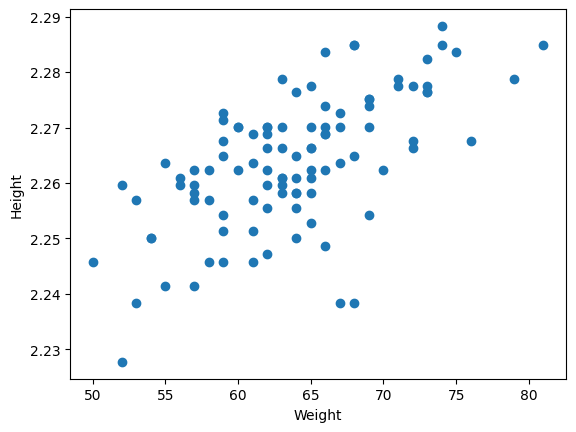

In [6]:
#scatterplot 
plt.scatter(df['Weight(kg)'],df['Height(cm)'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

'''to check whether the data is positive or negative use co relation'''

In [8]:
#co-relaton
df.corr()

,Height(cm),Weight(kg)
Height(cm),1.000000,0.630173
Weight(kg),0.630173,1.000000


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
df['Height(cm)'] = np.log(df['Height(cm)'])
df['Height(cm)'] = np.sqrt(df['Height(cm)'])


<Axes: xlabel='Weight(kg)', ylabel='Height(cm)'>

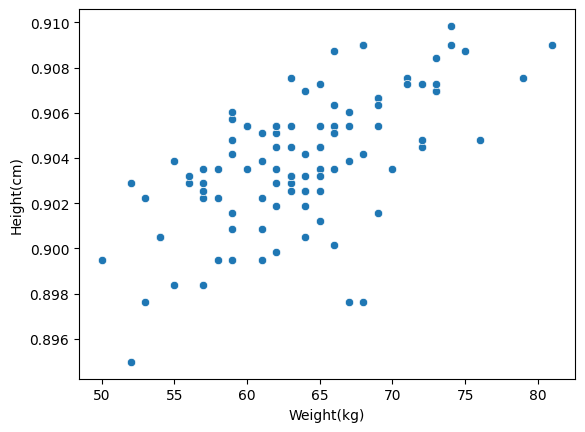

In [11]:
import seaborn as sns
sns.scatterplot(x='Weight(kg)', y='Height(cm)', data=df)


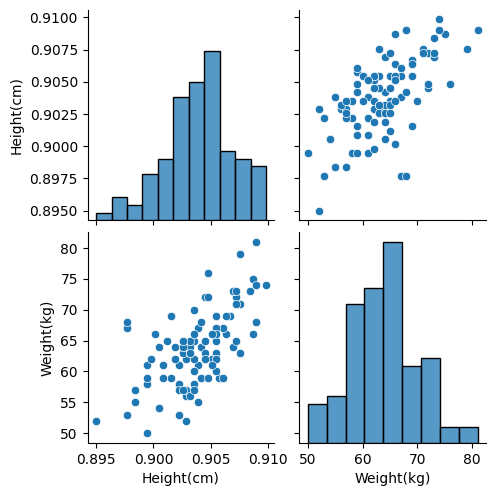

In [12]:
import seaborn as sns
sns.pairplot(df)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
#1 we need to divide the data into dependent and independent featureX
#note: data must be dataframe i.e 2d array
X=df[['Weight(kg)']]
X.shape

(100, 1)

In [15]:
#next data be series i.e 1D array
Y=df['Height(cm)']
Y.shape

(100,)

In [16]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=45)

In [17]:
X_train.shape

(75, 1)

In [18]:
print(np.isnan(Y_train).sum())

0


In [19]:
# Apply this before StandardScaler
from scipy.stats import zscore
import pandas as pd
import numpy as np
# If X_train and Y_train are already arrays, this will work
raw_df = pd.DataFrame({
    'X': np.ravel(X_train),
    'Y': np.ravel(Y_train)
})



# Remove outliers before scaling
z_scores = np.abs(zscore(raw_df))
filtered_df = raw_df[(z_scores < 3).all(axis=1)]

# Update X_train and Y_train with filtered values
X_train = filtered_df[['X']].values
Y_train = filtered_df['Y'].values


In [20]:
# Combine into a DataFrame
train_df = pd.DataFrame({
    'X': X_train.ravel(),  # flatten if needed
    'Y': Y_train
})

# Drop rows with NaNs
train_df.dropna(inplace=True)

# Convert back to NumPy arrays
X_train = train_df[['X']].values  # keep 2D shape
Y_train = train_df['Y'].values    # 1D shape is fine

In [21]:
from scipy.stats import zscore


# Create a DataFrame from training data
train_df = pd.DataFrame({'X': X_train.ravel(), 'Y': Y_train})

# Calculate Z-scores
z_scores = np.abs(zscore(train_df))

# Keep only rows where both X and Y are within 3 standard deviations
filtered_df = train_df[(z_scores < 3).all(axis=1)]

# Convert back to numpy
X_train_clean = filtered_df[['X']].values

In [22]:
import pandas as pd

# Combine X_train and Y_train into a DataFrame
train_df = pd.DataFrame(X_train, columns=['Weight'])
train_df['Height'] = Y_train

# Apply IQR method
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
train_df_clean = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Extract cleaned data
X_train = train_df_clean[['Weight']].values
Y_train = train_df_clean['Height'].values


<Axes: xlabel='Weight(kg)', ylabel='Height(cm)'>

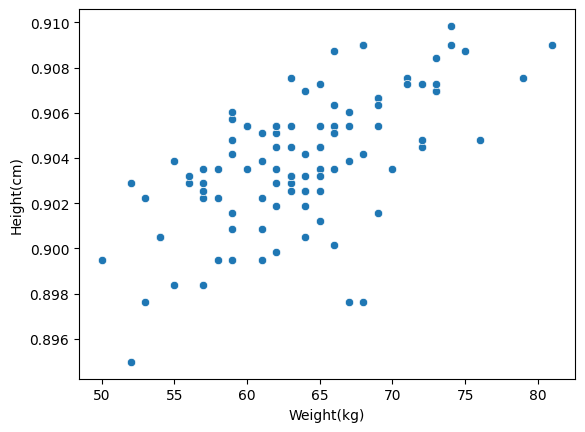

In [23]:
sns.scatterplot(x='Weight(kg)', y='Height(cm)', data=df)

### Standardization
in mathametic approach it take time to come through gradient desent so we use z score remember we need to us only trained model mean and SD we are not allowed to perform any opppp on test data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
# '''only train model fit_transform'''

In [26]:
#test data transform so that model dont know the data leak
X_test=scaler.transform(X_test)

/home/himamanth/Documents/college stuff/Py projects/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [27]:
X_test.shape

(25, 1)

In [28]:

Y_train_clean = filtered_df['Y'].values
print(np.isnan(Y_train).sum())



0


In [29]:
#apply simpl Linear Regression
from sklearn.linear_model import LinearRegression

In [30]:
regression=LinearRegression()

In [31]:
print(np.isnan(X_train).sum())  # how many NaNs in X_train
print(np.isnan(Y_train).sum())  # how many NaNs in Y_train


0
0


In [32]:
# Combine into a DataFrame
train_df = pd.DataFrame({
    'X': X_train.ravel(),  # flatten if needed
    'Y': Y_train
})

# Drop rows with NaNs
train_df.dropna(inplace=True)

# Convert back to NumPy arrays
X_train = train_df[['X']].values  # keep 2D shape
Y_train = train_df['Y'].values    # 1D shape is fine

In [33]:
regression.fit(X_train,Y_train)

LinearRegression()

In [34]:
coefficientslope=regression.coef_
print(coefficientslope)

[0.00165085]


In [35]:
iintercept=regression.intercept_
print(iintercept)

0.9043150983648913


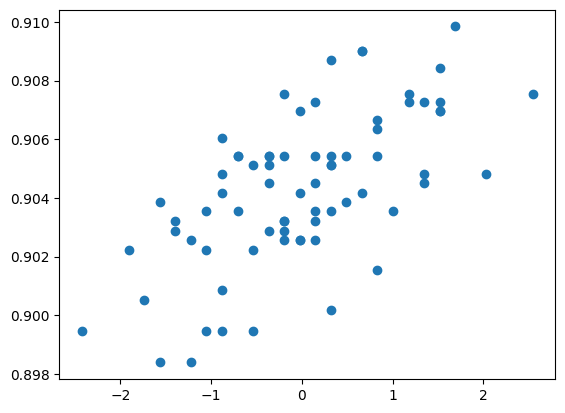

In [36]:
#plot best fit line
plt.scatter(X_train,Y_train)


Intercept: 0.9043150983648913
Slope: [0.00165085]


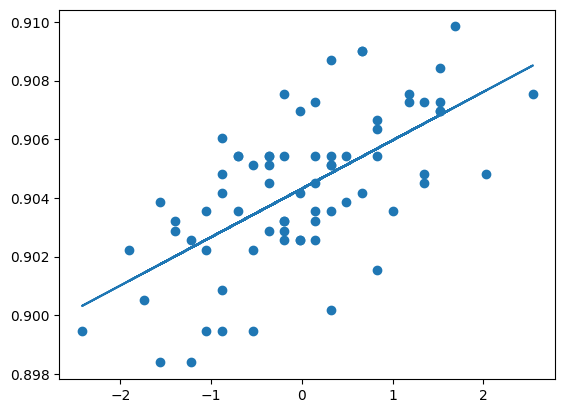

In [37]:
#best fit line 
print("Intercept:",iintercept)
print("Slope:",coefficientslope)
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [38]:
##prediction for test data
Y_pred=regression.predict(X_test)
Y_pred

array([0.90286156, 0.90342726, 0.90427581, 0.90455866, 0.90116445,
       0.90229585, 0.90399296, 0.90371011, 0.90484152, 0.90286156,
       0.90229585, 0.9014473 , 0.90229585, 0.90342726, 0.90427581,
       0.90371011, 0.90371011, 0.90569007, 0.9008816 , 0.9008816 ,
       0.90427581, 0.90512437, 0.90738718, 0.90455866, 0.90710433])

In [39]:
Y_pred,Y_test

(array([0.90286156, 0.90342726, 0.90427581, 0.90455866, 0.90116445,
        0.90229585, 0.90399296, 0.90371011, 0.90484152, 0.90286156,
        0.90229585, 0.9014473 , 0.90229585, 0.90342726, 0.90427581,
        0.90371011, 0.90371011, 0.90569007, 0.9008816 , 0.9008816 ,
        0.90427581, 0.90512437, 0.90738718, 0.90455866, 0.90710433]),
 0     0.905747
 1     0.903861
 62    0.900522
 76    0.904499
 37    0.897653
 99    0.903538
 78    0.904499
 38    0.899822
 2     0.906357
 84    0.901551
 60    0.902886
 26    0.900522
 69    0.902223
 33    0.900868
 51    0.903213
 4     0.903538
 92    0.901888
 7     0.906659
 10    0.902886
 74    0.894980
 45    0.901888
 9     0.906053
 20    0.908715
 18    0.901211
 73    0.909001
 Name: Height(cm), dtype: float64)

# Prediction of test data
1.predicted height output= intercept + coef_(weights)



2.y_pred_test =168.42+6.14(X_test)

In [40]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5.240806749642627e-06
0.0018029221743228918
0.0022892808367787963


## R Square
Formula


**R^2 =1-SSR/SST**


R^2 = coefficient of determination


SSR = sum of squares of residuals


SST = total sum of squares

In [42]:
from sklearn.metrics import r2_score


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [44]:
Y_train

array([0.89946802, 0.90481398, 0.90353819, 0.90543792, 0.89946802,
       0.90512709, 0.90449857, 0.90353819, 0.90755255, 0.90353819,
       0.90871524, 0.90222346, 0.90321324, 0.90052185, 0.90418082,
       0.89946802, 0.90543792, 0.90543792, 0.90725682, 0.90512709,
       0.90543792, 0.90481398, 0.90449857, 0.90353819, 0.90900098,
       0.90481398, 0.90543792, 0.90755255, 0.90222346, 0.90086754,
       0.90755255, 0.90605289, 0.90695902, 0.90725682, 0.89838818,
       0.90255591, 0.90665911, 0.90288583, 0.90386071, 0.90353819,
       0.90321324, 0.90725682, 0.90321324, 0.90984676, 0.90512709,
       0.90255591, 0.9015508 , 0.90449857, 0.90725682, 0.90543792,
       0.90543792, 0.90255591, 0.90695902, 0.90512709, 0.90543792,
       0.90288583, 0.90288583, 0.90418082, 0.90321324, 0.90635708,
       0.89838818, 0.90842755, 0.90255591, 0.90543792, 0.90017339,
       0.90255591, 0.90386071, 0.89946802, 0.90418082, 0.90900098,
       0.90222346, 0.90695902])

In [45]:
from sklearn.metrics import r2_score
reg= LinearRegression()
reg.fit(X_train_poly,Y_train)
Y_pred_p=reg.predict(X_test_poly)
score=r2_score(Y_test,Y_pred_p)
print(score)

0.4636576531630554


TypeError: scatter() missing 1 required positional argument: 'y'

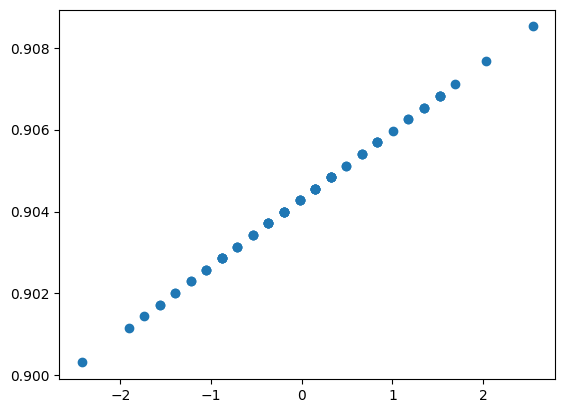

In [46]:
plt.scatter(X_train,reg.predict(X_train_poly))
plt.scatter(X_train_poly,)

In [ ]:
score=r2_score(Y_test,Y_pred)
print(score)

0.4644533785474133


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Degree 2 polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, Y_train)

Y_pred = poly_model.predict(X_test)
print("Polynomial R² Score:", r2_score(Y_test, Y_pred))


Polynomial R² Score: 0.4644533785474133


### Lasso Regression


0.0026925755359021373
-0.18155258196612767


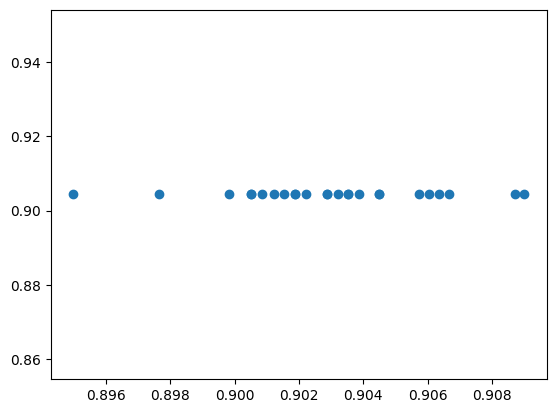

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train,Y_train)
Y_pred1=lasso.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred1)
score=r2_score(Y_test,Y_pred1)
print(mae)
print(score)
plt.scatter(Y_test,Y_pred1)

0.0018104261304168511
0.45930621177477216


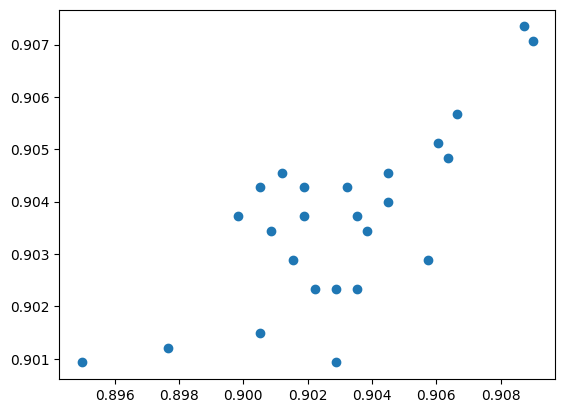

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
rid = Ridge()
rid.fit(X_train,Y_train)
Y_pred1=rid.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred1)
score=r2_score(Y_test,Y_pred1)
print(mae)
print(score)
plt.scatter(Y_test,Y_pred1)